![gym](gym.png)


You are a product manager for a fitness studio and are interested in understanding the current demand for digital fitness classes. You plan to conduct a market analysis in Python to gauge demand and identify potential areas for growth of digital products and services.

### The Data

You are provided with a number of CSV files in the "Files/data" folder, which offer international and national-level data on Google Trends keyword searches related to fitness and related products. 

### workout.csv

| Column     | Description              |
|------------|--------------------------|
| `'month'` | Month when the data was measured. |
| `'workout_worldwide'` | Index representing the popularity of the keyword 'workout', on a scale of 0 to 100. |

### three_keywords.csv

| Column     | Description              |
|------------|--------------------------|
| `'month'` | Month when the data was measured. |
| `'home_workout_worldwide'` | Index representing the popularity of the keyword 'home workout', on a scale of 0 to 100. |
| `'gym_workout_worldwide'` | Index representing the popularity of the keyword 'gym workout', on a scale of 0 to 100. |
| `'home_gym_worldwide'` | Index representing the popularity of the keyword 'home gym', on a scale of 0 to 100. |

### workout_geo.csv

| Column     | Description              |
|------------|--------------------------|
| `'country'` | Country where the data was measured. |
| `'workout_2018_2023'` | Index representing the popularity of the keyword 'workout' during the 5 year period. |

### three_keywords_geo.csv

| Column     | Description              |
|------------|--------------------------|
| `'country'` | Country where the data was measured. |
| `'home_workout_2018_2023'` | Index representing the popularity of the keyword 'home workout' during the 5 year period. |
| `'gym_workout_2018_2023'` | Index representing the popularity of the keyword 'gym workout' during the 5 year period.  |
| `'home_gym_2018_2023'` | Index representing the popularity of the keyword 'home gym' during the 5 year period. |

In [7]:
# Import the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
# Start coding here

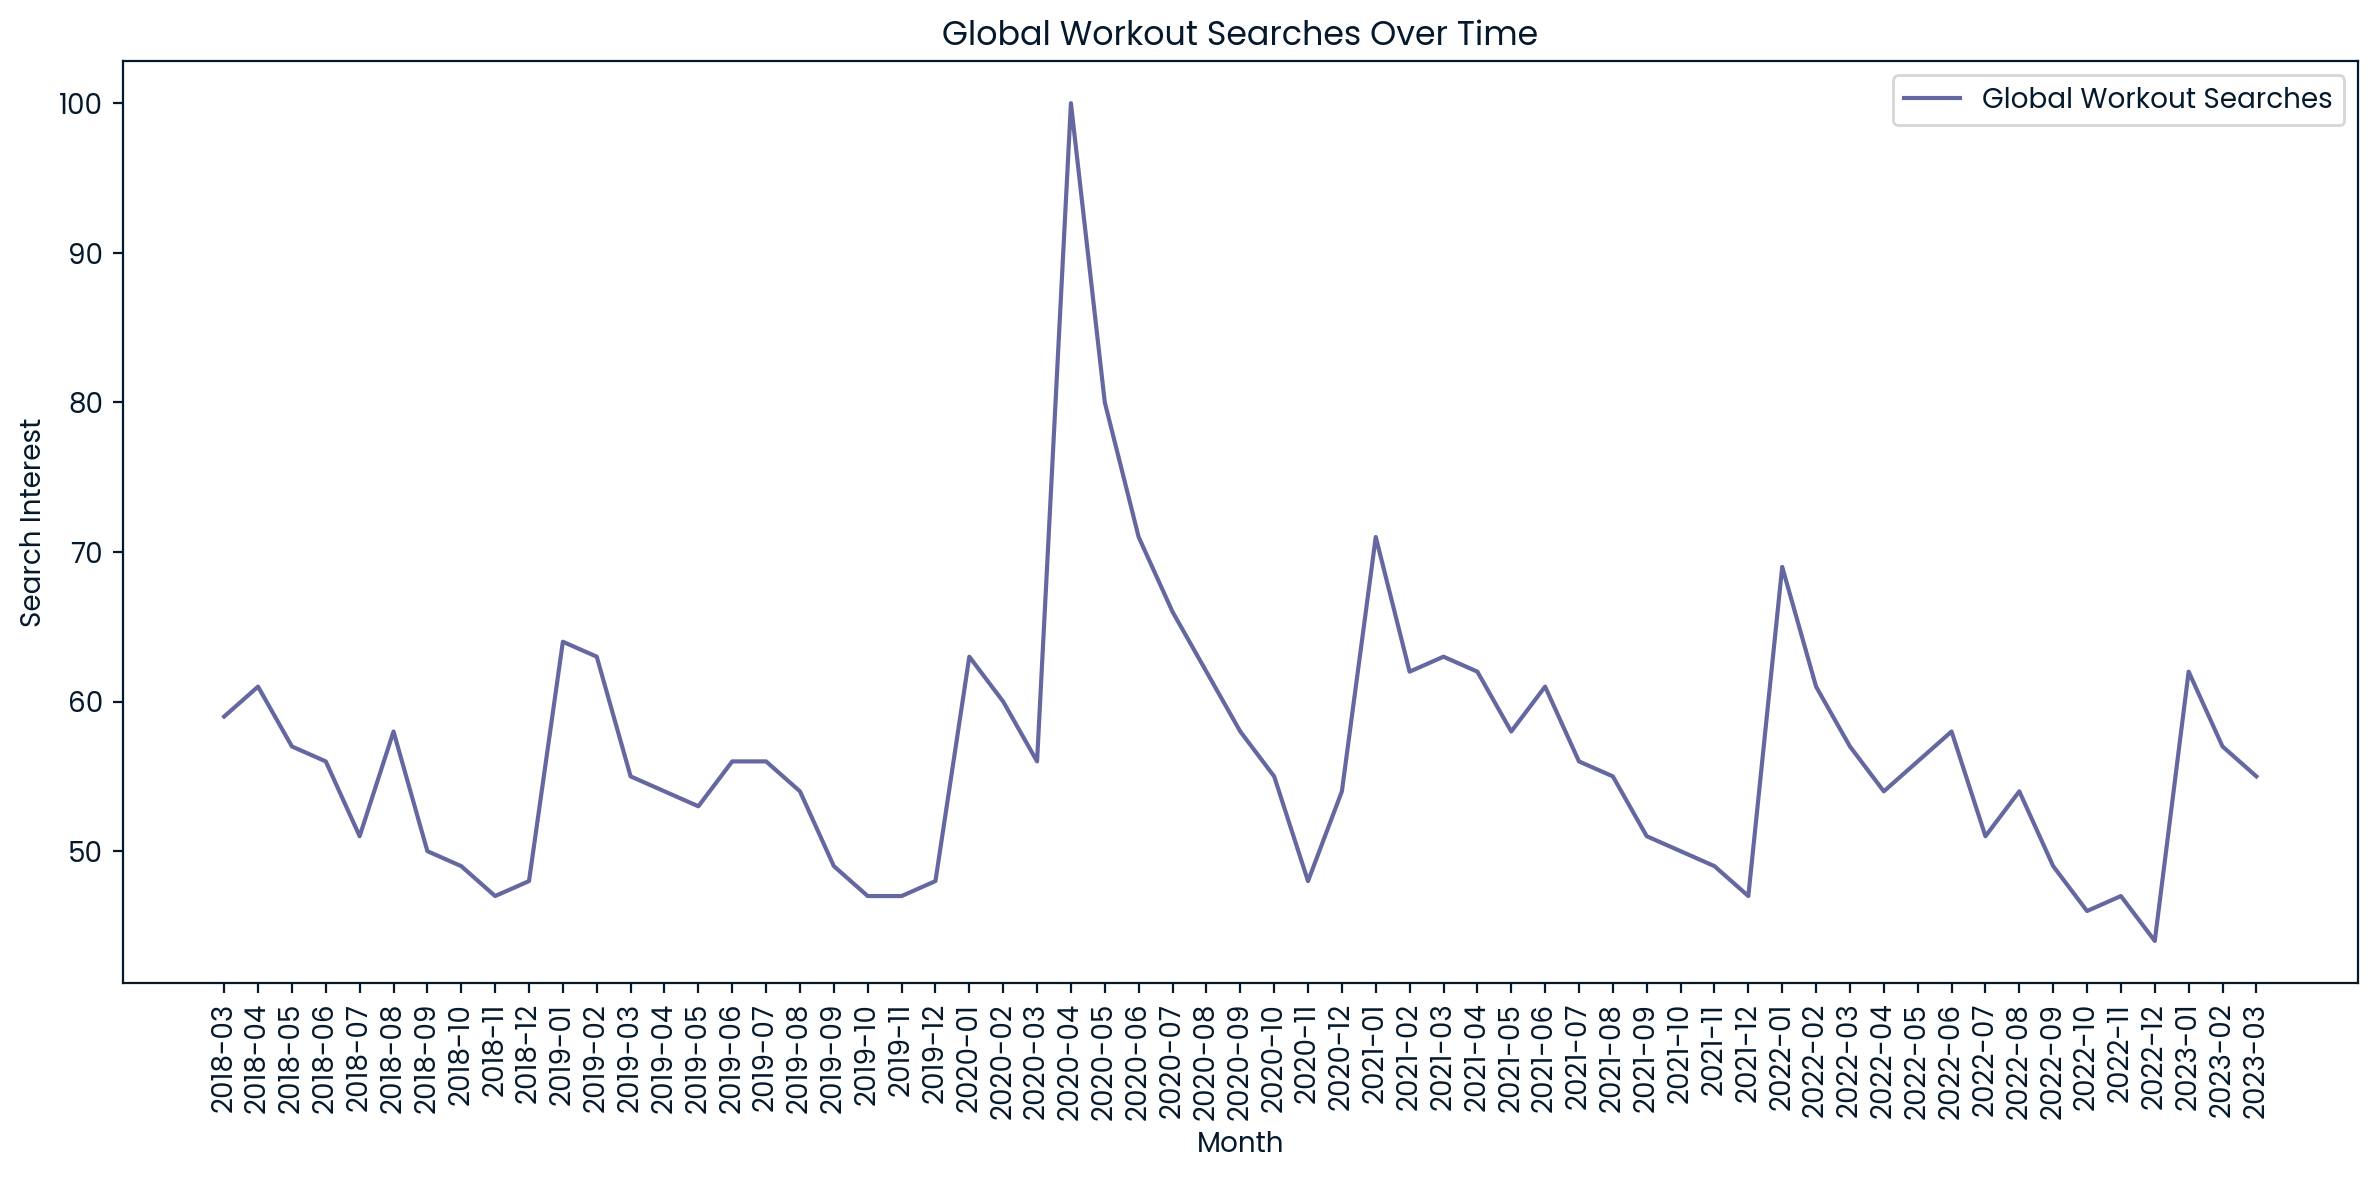

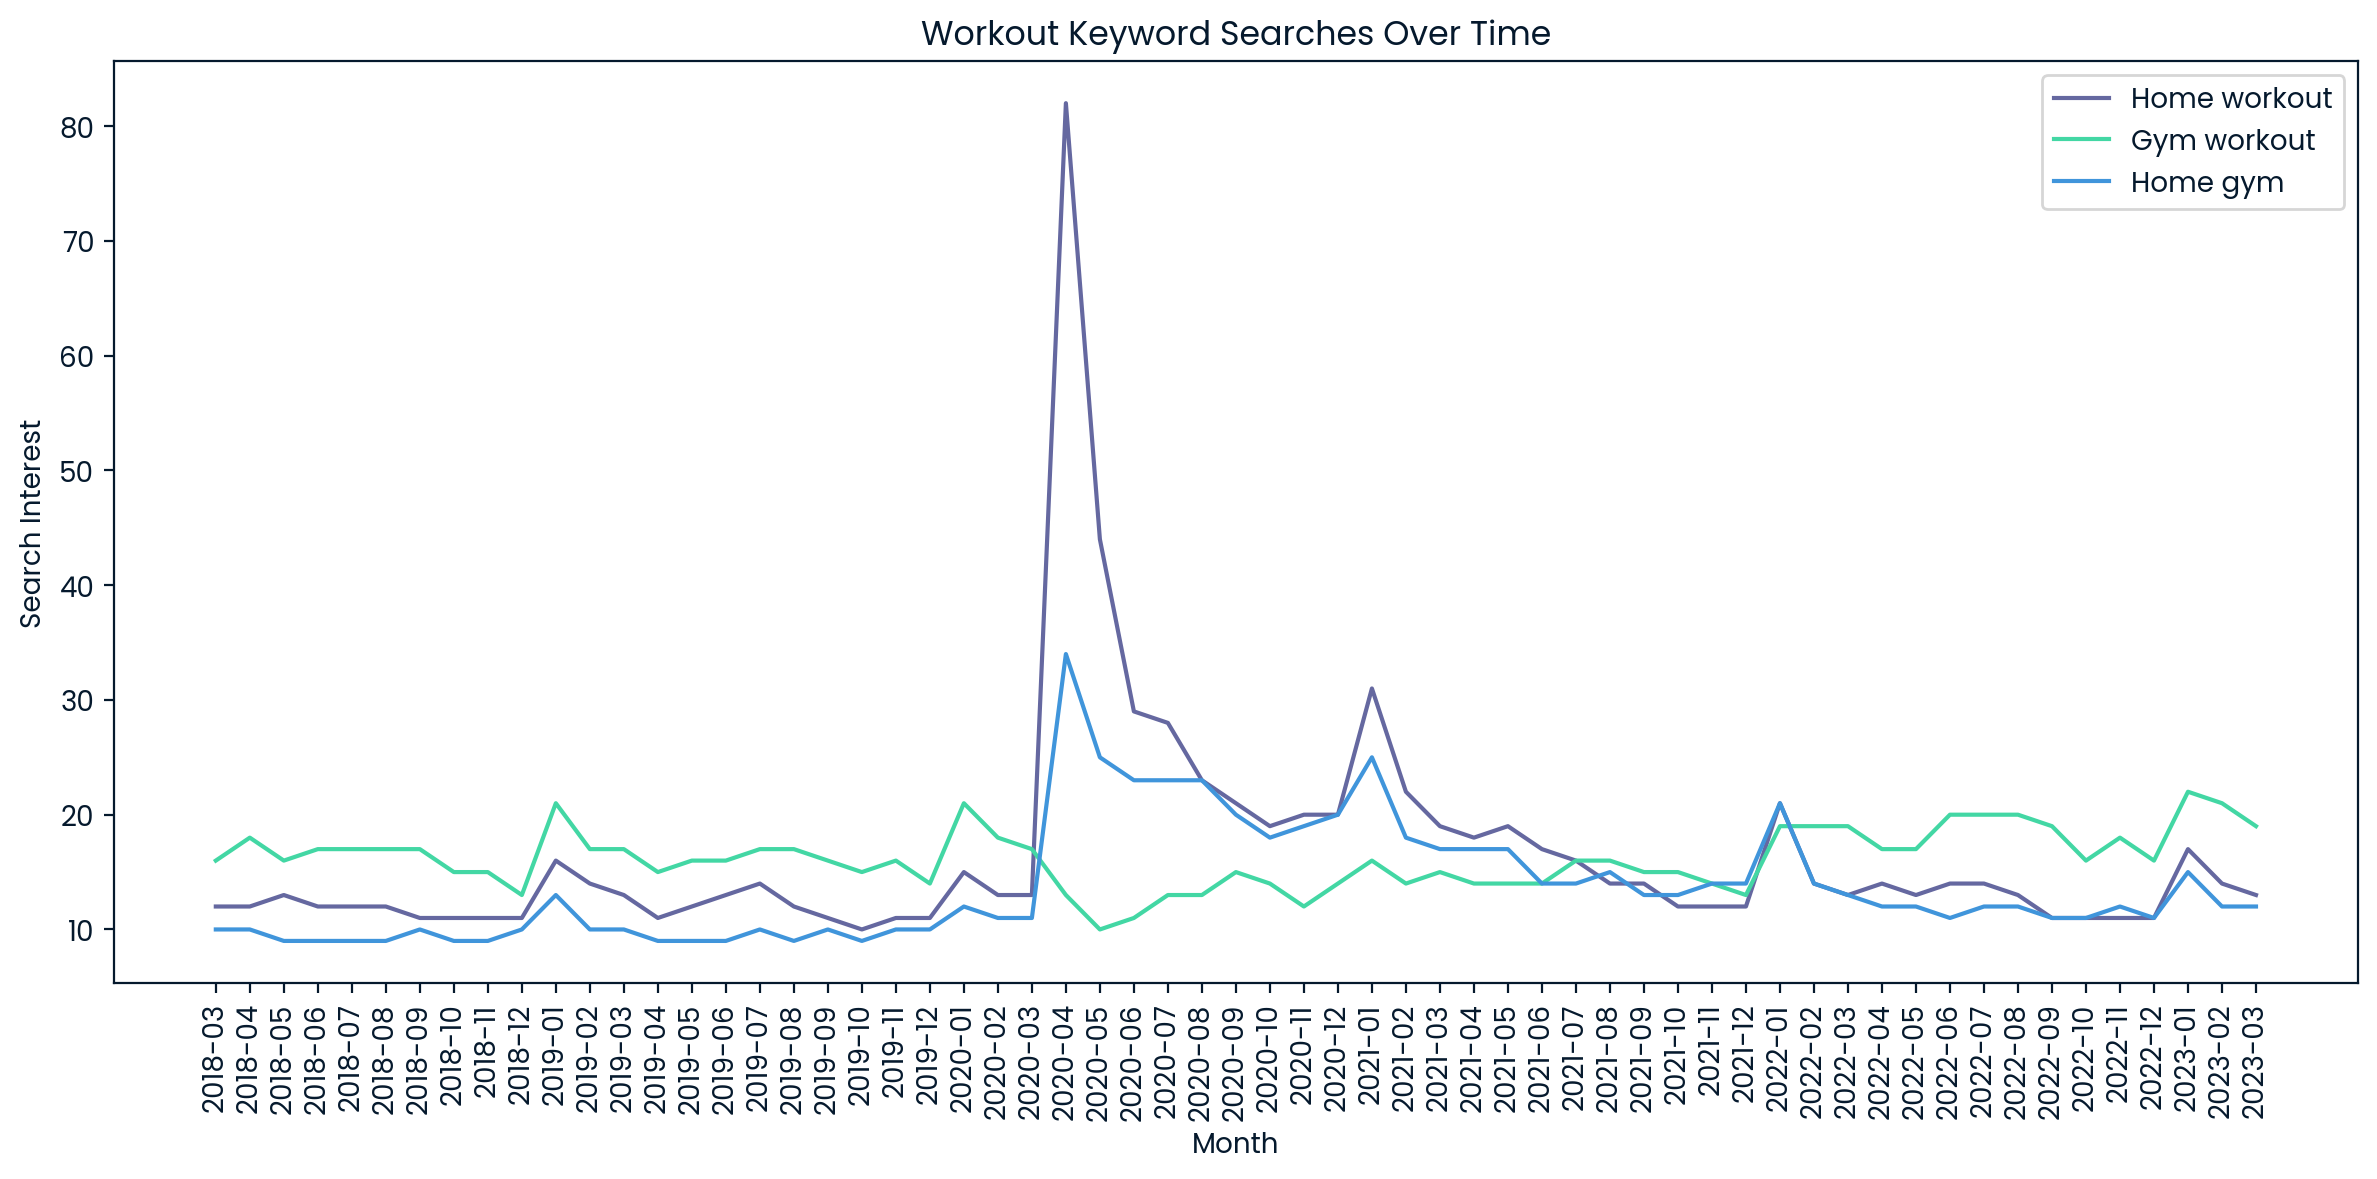

The current choice of workout for 2023-03 is 'gym_workout_worldwide' with an interest value of 19.
The country with the highest interest in workouts: United States with a total interest score of 100.0
Top 2 countries with the highest interest in home workouts:
Country
Iran           58.0
Nigeria        56.0
Philippines    52.0
Switzerland    52.0
Turkey         52.0
Name: home_workout_2018_2023, dtype: float64


In [10]:


# File paths
WORKOUT_FILE = "data/workout.csv"
KEYWORDS_FILE = "data/three_keywords.csv"
WORKOUT_GEO_FILE = "data/workout_geo.csv"
KEYWORDS_GEO_FILE = "data/three_keywords_geo.csv"

# Load data
df_workout = pd.read_csv(WORKOUT_FILE)
df_keywords = pd.read_csv(KEYWORDS_FILE)
df_workout_geo = pd.read_csv(WORKOUT_GEO_FILE, index_col=0)
df_keywords_geo = pd.read_csv(KEYWORDS_GEO_FILE, index_col=0)

# Plot Global Workout Searches
plt.figure(figsize=(12, 6))
plt.plot(df_workout["month"], df_workout["workout_worldwide"], label="Global Workout Searches")
plt.title("Global Workout Searches Over Time")
plt.xlabel("Month")
plt.ylabel("Search Interest")
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

# Plot Keyword Searches Over Time
plt.figure(figsize=(12, 6))
plt.plot(df_keywords["month"], df_keywords["home_workout_worldwide"], label="Home workout")
plt.plot(df_keywords["month"], df_keywords["gym_workout_worldwide"], label="Gym workout")
plt.plot(df_keywords["month"], df_keywords["home_gym_worldwide"], label="Home gym")
plt.title("Workout Keyword Searches Over Time")
plt.xlabel("Month")
plt.ylabel("Search Interest")
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

# Find the most recent month in the dataset
most_recent_month = df_keywords["month"].max()

# Filter the data for the most recent month
current_data = df_keywords[df_keywords["month"] == most_recent_month]

# Determine the workout type with the highest interest for the most recent month
current_choice = current_data[["home_workout_worldwide", "gym_workout_worldwide", "home_gym_worldwide"]].idxmax(axis=1).values[0]
current_interest_value = current_data[["home_workout_worldwide", "gym_workout_worldwide", "home_gym_worldwide"]].max(axis=1).values[0]

print(f"The current choice of workout for {most_recent_month} is '{current_choice}' with an interest value of {current_interest_value}.")

# Sum interest values for each country
country_interest_sums = df_workout_geo.sum(axis=1)

# Find the country with the highest interest
top_country = country_interest_sums.idxmax()
top_country_interest = country_interest_sums.max()

print(f"The country with the highest interest in workouts: {top_country} with a total interest score of {top_country_interest}")

# Sum interest values for home workouts for each country
home_workout_sums = df_keywords_geo["home_workout_2018_2023"].sum(level=0)

# Sort countries by home workout interest
sorted_home_workout_sums = home_workout_sums.sort_values(ascending=False)

# Get the top 5 countries with the highest interest in home workouts
top_5_home_workout_countries = sorted_home_workout_sums.head()

print("Top 5 countries with the highest interest in home workouts:")
print(top_2_home_workout_countries)